In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, auc,
                             classification_report)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df1 = pd.read_csv('data/train.csv', sep=',')

In [3]:
df = df1.copy()

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Проверим на дубликаты

In [8]:
df.duplicated().sum()

0

## Предобработка данных

В столбцах Alley, FireplaceQu, PoolQC, Fence, MiscFeature отсутствует большое количество данных, а так же среди них нет важных для обучения модели. Удалим их

In [9]:
del_columns = ['Alley','FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
for i in  df.columns:
    if i in del_columns:
        df = df.drop([i], axis=1)

#### Проверим корреляцию по численным признакам

In [10]:
df.corr()['SalePrice'].sort_values(ascending=False)

C:\Users\hp\AppData\Local\Temp\ipykernel_9500\1823528897.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['SalePrice'].sort_values(ascending=False)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

С целевым признаком SalePrice больше всего коррелируют следующие признаки:
- 1) OverallQual - Общее качество материала и отделки 
- 2) GrLivArea - Надземная (наземная) площадь в квадратных футах Надземная (наземная) площадь в квадратных футах 
- 3) GarageCars - Размер гаража на вместимость машины Размер гаража на вместимость машины 
- 4) GarageArea - Размер гаража в квадратных футах 
- 5) TotalBsmtSF - Общая площадь подвала 
- 6) 1stFlrSF - Первый этаж квадратных футов Первый этаж квадратных футов 
- 7) FullBath - Полные ванные комнаты выше класса 
- 8) TotRmsAbvGrd - Общее количество комнат верхних этажей (не включает ванные комнаты)
- 9) YearBuilt - Год постройки
- 10) YearRemodAdd - Год ремонта 
- 11) GarageYrBlt - Год постройки гаража
- 12) MasVnrArea - Площадь кирпичной фанеры в квадратных футах можно грубо понимать как площадь застройки известковой структурой. 
- 13) Fireplaces - Количество каминов 
- 14) BsmtFinSF1 - Качество подвального помещения готовой площади Тип 1 готовые квадратные футы 
- 15) LotFrontage - Улицы, связанные с собственностью 
- 16) WoodDeckSF - Площадь деревянного покрытия 
- 17) 2ndFlrSF - Второй этаж квадратных футов 
- 18) OpenPorchSF - Площадь открытого крыльца в квадратных футах 

По остальным параметрам корреляция меньше 0,3


Оставим в таблице только эти столбцы и еще раз построим таблицу коррелляции по ним. Оцифровка данных типа object не дала улучшения показателей, так что избавляемся от них тоже

In [11]:
korr_columns = ['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF',
                'FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','MasVnrArea',
                'Fireplaces','BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF']
for i in  df.columns:
    if i not in korr_columns:
        df = df.drop([i], axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   OverallQual   1460 non-null   int64  
 2   YearBuilt     1460 non-null   int64  
 3   YearRemodAdd  1460 non-null   int64  
 4   MasVnrArea    1452 non-null   float64
 5   BsmtFinSF1    1460 non-null   int64  
 6   TotalBsmtSF   1460 non-null   int64  
 7   1stFlrSF      1460 non-null   int64  
 8   2ndFlrSF      1460 non-null   int64  
 9   GrLivArea     1460 non-null   int64  
 10  FullBath      1460 non-null   int64  
 11  TotRmsAbvGrd  1460 non-null   int64  
 12  Fireplaces    1460 non-null   int64  
 13  GarageYrBlt   1379 non-null   float64
 14  GarageCars    1460 non-null   int64  
 15  GarageArea    1460 non-null   int64  
 16  WoodDeckSF    1460 non-null   int64  
 17  OpenPorchSF   1460 non-null   int64  
 18  SalePrice     1460 non-null 

<AxesSubplot: >

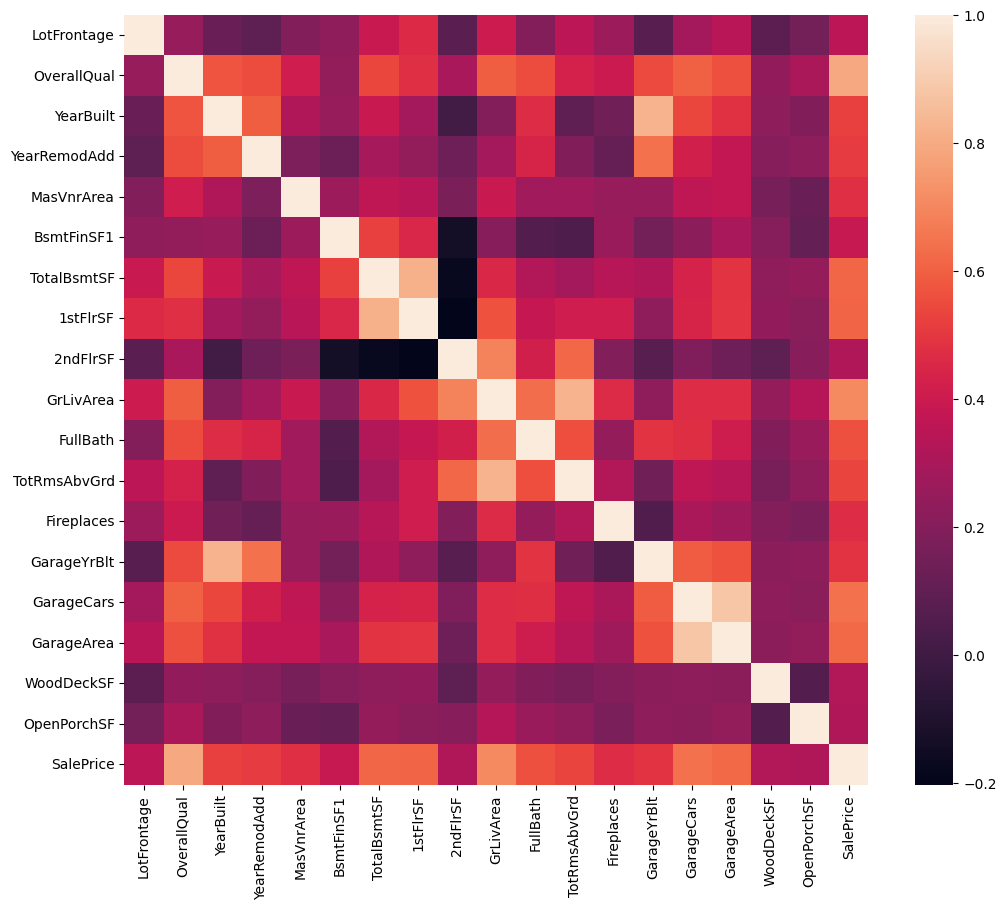

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr())

Столбцы GarageArea и GarageCars сильно коррелируют между собой. Методом проб выяснилось, что удаление столбца GarageCars улучшает результат обучения

In [14]:
df = df.drop(['GarageCars'], axis=1)

Так же есть сильная корреляция между столбцами TotalBsmtSF и  1stFlrSF. Лучший результат дало удаление TotalBsmtSF

In [15]:
df = df.drop(['TotalBsmtSF'], axis=1)

Аналогичная ситуация с GrLivArea и TotRmsAbvGrd  и парой признаков GarageYrBlt и YearBuilt. Удаляем TotRmsAbvGrd и GarageYrBlt

In [16]:
df = df.drop(['TotRmsAbvGrd'], axis=1)

In [17]:
df = df.drop(['GarageYrBlt'], axis=1)

Мы удалили все сильно скоррелированные признаки

#### Проверим распределение данных по основным признакам

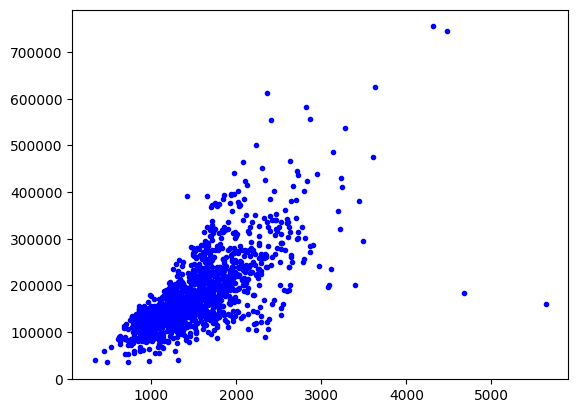

In [18]:
x = df['GrLivArea']
y = df['SalePrice']
plt.plot(x, y, 'b.')

Удалим выбросы

In [19]:
df[(df['GrLivArea']>4000) & (df['SalePrice']<400000)][['SalePrice', 'GrLivArea']]

,SalePrice,GrLivArea
523,184750,4676
1298,160000,5642


In [20]:
index_drop=df[(df['GrLivArea']>4000) & (df['SalePrice']<400000)].index
df=df.drop(index_drop, axis=0)

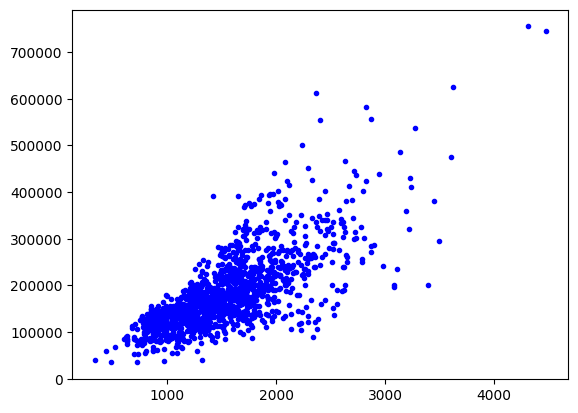

In [21]:
x = df['GrLivArea']
y = df['SalePrice']
plt.plot(x, y, 'b.')

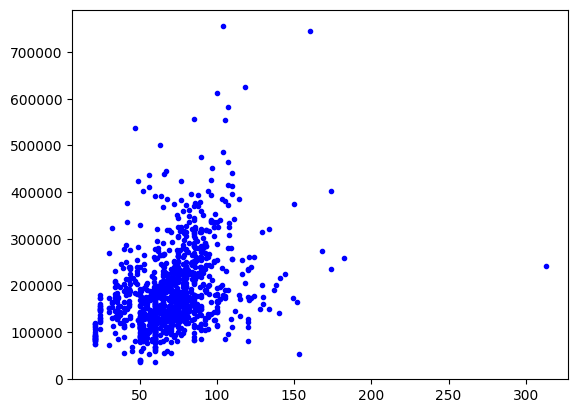

In [22]:
x = df['LotFrontage']
y = df['SalePrice']
plt.plot(x, y, 'b.')

Удалим выбросы

In [23]:
index_drop=df[(df['LotFrontage']<60) & (df['SalePrice']>500000)].index
df=df.drop(index_drop, axis=0)

In [24]:
index_drop=df[(df['LotFrontage']>150) & (df['SalePrice']<300000)].index
df=df.drop(index_drop, axis=0)

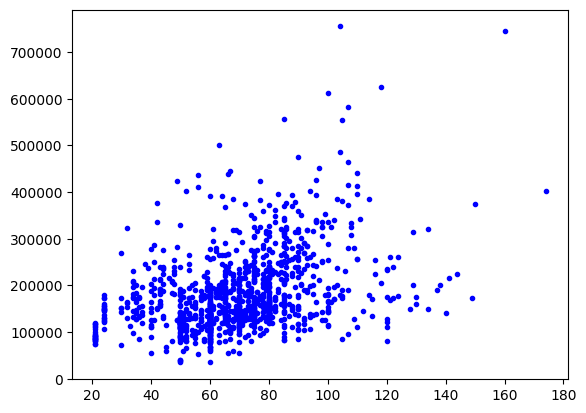

In [25]:
x = df['LotFrontage']
y = df['SalePrice']
plt.plot(x, y, 'b.')

#### Удаление лишних столбцов и строк

Удаление следующих столбцов улучшает результат обучения

In [26]:
df = df.drop(['OpenPorchSF'], axis=1)
df = df.drop(['2ndFlrSF'], axis=1)
df = df.drop(['WoodDeckSF'], axis=1)
df = df.drop(['FullBath'], axis=1)

In [27]:
# Удалим строки, в которых пропущены данные
df.dropna(inplace = True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1186 non-null   float64
 1   OverallQual   1186 non-null   int64  
 2   YearBuilt     1186 non-null   int64  
 3   YearRemodAdd  1186 non-null   int64  
 4   MasVnrArea    1186 non-null   float64
 5   BsmtFinSF1    1186 non-null   int64  
 6   1stFlrSF      1186 non-null   int64  
 7   GrLivArea     1186 non-null   int64  
 8   Fireplaces    1186 non-null   int64  
 9   GarageArea    1186 non-null   int64  
 10  SalePrice     1186 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 111.2 KB


## Используемые метрики

**MSE** - должна стремиться к нулю. Высокая чувствительность к выбросам.

**MAE** -  метрика абсолютного отклонения. Должна стремиться к нулю. 

**R2** - имеет диапазон от  минус бесконечности до 1. Должна стремиться к 1

## Обучение моделей

#### Создание пайплайна

Создадим пайплайн в который будет входить PolynomialFeatures и StandardScaler. На выходе будем видеть среднее арифметическое по 50-и прогонам обучения для каждой из 4х метрик.

In [29]:
def try_model(model, polynomial_degree=1, model_params=None):
    if model_params is None:
        model_params = dict()
    print(model.__name__)
    pipeline = make_pipeline(PolynomialFeatures(degree=polynomial_degree),StandardScaler(), model(**model_params))
    
    x = df.drop('SalePrice', axis = 1)
    y = df['SalePrice']
    
    n = 50
    
    MSE = 0,
    MAE = 0
    MAPE= 0
    R2 = 0
    for i in range(1,n+1):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, train_size=0.75, random_state=i )
        pipeline.fit(x_train, y_train)
        y_pred = pipeline.predict(x_test)
        MSE+=mean_squared_error(y_test, y_pred)
        MAE+=mean_absolute_error(y_test, y_pred)
        MAPE+=mean_absolute_percentage_error(y_test, y_pred)
        R2+=pipeline.score(x_test, y_test)
        
    print('MSE:', MSE/n )
    print('MAE:', MAE/n)
    print('MAPE:', MAPE/n)
    print('R2:', R2/n)    

    return pipeline

#### LinearRegression()

In [30]:
try_model(LinearRegression)

LinearRegression
MSE: [1.08267058e+09]
MAE: 22593.70714847981
MAPE: 0.14334855241944952
R2: 0.8433839086799915


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

#### Ridge-регрессия

In [31]:
try_model(Ridge)

Ridge
MSE: [1.08255222e+09]
MAE: 22586.61096016361
MAPE: 0.1432697640562396
R2: 0.8434057891175132


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

Попробуем поэкспериментировать с параметром PolynomialFeatures

In [32]:
try_model(Ridge, 2)

Ridge
MSE: [6.87953077e+08]
MAE: 17747.02705866033
MAPE: 0.11161085553506407
R2: 0.899557003045262


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

PolynomialFeatures==2 дал наилучший результат

#### Lasso-регрессия

In [33]:
try_model(Lasso)

Lasso
MSE: [1.08267307e+09]
MAE: 22593.63974872863
MAPE: 0.14334807338436092
R2: 0.8433836174309629


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

Попробуем поэкспериментировать с параметром PolynomialFeatures

In [34]:
try_model(Lasso, 2)

Lasso


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.468e+11, tolerance: 6.190e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.359e+11, tolerance: 5.563e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

MSE: [7.02718257e+08]
MAE: 17888.53921428669
MAPE: 0.11280807096923832
R2: 0.8973840791068224


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.467e+11, tolerance: 5.581e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.157e+11, tolerance: 6.116e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

PolynomialFeatures==2 дал наилучший результат

## Заключение

Лучший результат дал Ridge с параметром PolynomialFeatures==2. Запустим его еще раз для наглядности

In [35]:
try_model(Ridge, 2)

Ridge
MSE: [6.87953077e+08]
MAE: 17747.02705866033
MAPE: 0.11161085553506407
R2: 0.899557003045262


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])